In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [278]:
data = pd.read_csv('datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [279]:
data.shape

(768, 9)

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [281]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [282]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [283]:
import seaborn as sns

<Axes: >

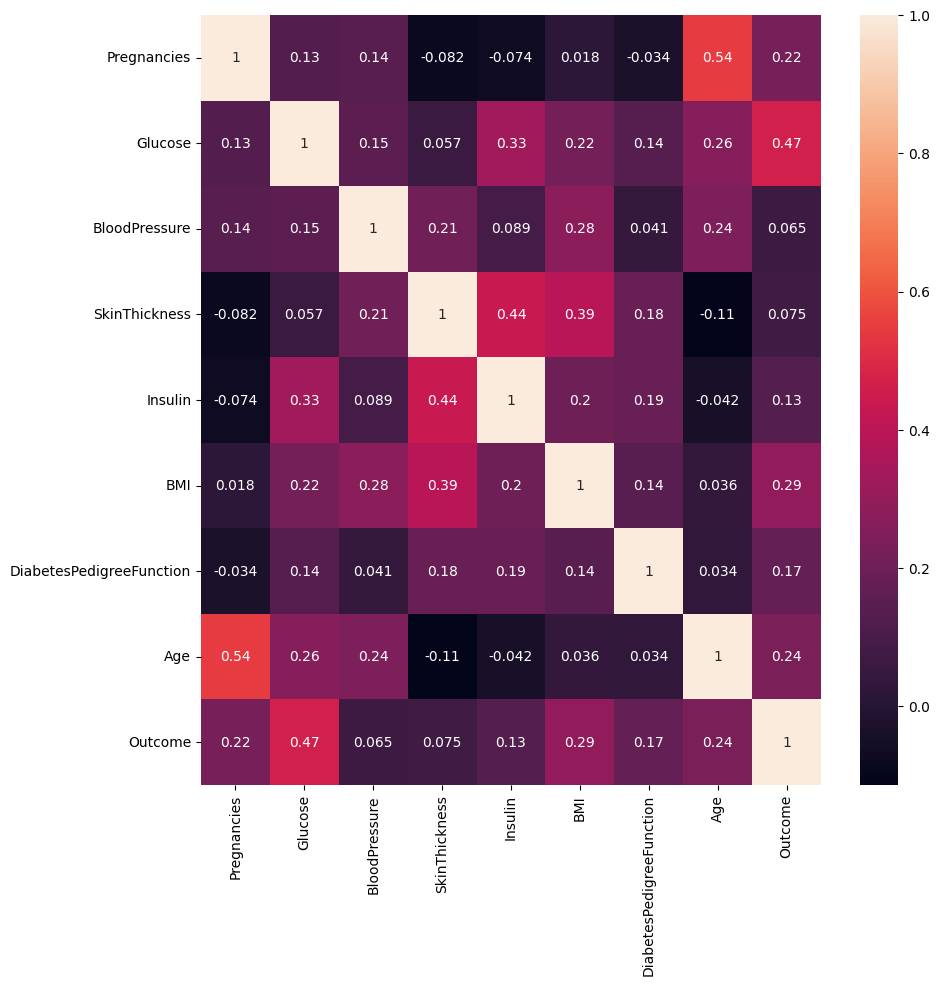

In [284]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [285]:
X = data.iloc[:,:-1]
y = data['Outcome']

In [286]:
X.shape

(768, 8)

In [287]:
y.shape

(768,)

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
print("Train Set: ", X_train.shape, Y_train.shape)
print("Test Set: ", X_test.shape, Y_test.shape)

Train Set:  (614, 8) (614,)
Test Set:  (154, 8) (154,)


In [291]:
from sklearn.metrics import accuracy_score

In [292]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [293]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=20),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [294]:
final_scores = {}

for name, model in models.items():
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    final_scores[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")


Logistic Regression Test Accuracy: 0.7468
Random Forest Test Accuracy: 0.7143
Support Vector Machine Test Accuracy: 0.7662
K-Nearest Neighbors Test Accuracy: 0.6623
Decision Tree Test Accuracy: 0.7403


In [295]:
# Convert accuracy scores into a DataFrame
accuracy_df = pd.DataFrame(list(final_scores.items()), columns=["Classifier", "Test Accuracy"])
print(accuracy_df)


               Classifier  Test Accuracy
0     Logistic Regression       0.746753
1           Random Forest       0.714286
2  Support Vector Machine       0.766234
3     K-Nearest Neighbors       0.662338
4           Decision Tree       0.740260


In [296]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(estimators=[
    ('lr', models['K-Nearest Neighbors']), 
    ('rf', models['Random Forest']),
    ('dt', models['Decision Tree'])
], voting='soft')

In [297]:
# Train the ensemble model
ensemble_clf.fit(X_train, Y_train)

# Predictions
y_pred = ensemble_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.7597


In [298]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [299]:
print(accuracy_score(Y_test, model.predict(X_test))*100)

72.72727272727273


In [300]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', models['Random Forest']),
    ('svm', models['Decision Tree'])
]

# Define meta-model
meta_model = models['Support Vector Machine']

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, stack_method='auto')



In [301]:
# Train the stacking model
stacking_clf.fit(X_train, Y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                               ('svm', DecisionTreeClassifier())],
                   final_estimator=SVC(probability=True))

In [302]:

# Predictions
y_pred = stacking_clf.predict(X_test)

In [303]:
from sklearn.metrics import classification_report

# Evaluate performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

# Detailed Classification Report
print(classification_report(Y_test, y_pred))

Stacking Classifier Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [304]:
feature_name=X_train.columns.tolist()

In [305]:
feature_importance = pd.Series(model.feature_importances_, index=feature_name)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 Glucose                     0.249182
BMI                         0.188625
Age                         0.139461
DiabetesPedigreeFunction    0.123044
Pregnancies                 0.082702
BloodPressure               0.081096
SkinThickness               0.073898
Insulin                     0.061992
dtype: float64


                 Model  Test Accuracy  CV Accuracy
1        Decision Tree       0.798701     0.744276
2          Naive Bayes       0.766234     0.752472
4         SVM (Linear)       0.759740     0.762228
0  Logistic Regression       0.746753     0.765507
5        Random Forest       0.746753     0.754085
3                 k-NN       0.707792     0.744289


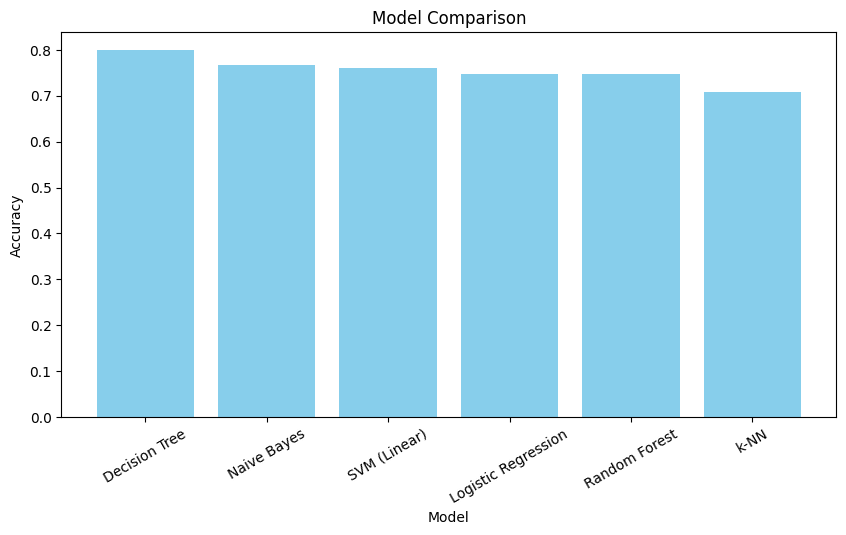

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Feature scaling for k-NN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM (Linear)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=5)
}


# Train and evaluate models
results = []
for name, model in models.items():
    if name in ["k-NN", "SVM (Linear)"]:
        model.fit(X_train_scaled, y_train)
        accuracy = model.score(X_test_scaled, y_test)
        cv_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))
    else:
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    
    results.append({"Model": name, "Test Accuracy": accuracy, "CV Accuracy": cv_score})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=30)
plt.show()


In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    results.append({"Model": name, "Test Accuracy": accuracy, "CV Accuracy": cv_score})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)


                 Model  Test Accuracy  CV Accuracy
1        Decision Tree       0.792208     0.745902
0  Logistic Regression       0.759740     0.758976
3         SVM (Linear)       0.753247     0.765494
2        Random Forest       0.746753     0.768772
4                 k-NN       0.662338     0.718273


In [315]:
ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=5)),
        ('svm', SVC(kernel='linear', probability=True))
    ],
    voting='soft'  # Soft voting uses probability averaging
)

In [316]:


ensemble.fit(X_train, y_train)
print("Ensemble Accuracy:", ensemble.score(X_test, y_test))


Ensemble Accuracy: 0.7727272727272727


In [317]:
X_train.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [318]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, eval_metric="logloss")
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", xgb.score(X_test, y_test))


XGBoost Accuracy: 0.7532467532467533


In [319]:
model=ensemble

In [320]:
import pickle

In [321]:
pickle.dump(models['Random Forest'], open("models/diabetes.pkl",'wb'))

In [322]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')